## Predicting Customer response to Personal Loan Ad-Campaign

#### Dataset
The dataset is available at <strong>"data/personal_loan.csv"</strong> in the respective challenge's repo.<br>
Original Dataset : https://www.kaggle.com/itsmesunil/bank-loan-modelling

#### Features (X)
1. Age - Customer's age in completed years. (Numeric)
2. Experience - No. of years of professional experience (Numeric)
3. Income - Annual income of the customer. (Numeric)
4. ZIPCode - Home Address ZIP code. (Numeric)
5. Family - Family size of the customer. (Numeric)
6. CCAvg Avg. - Spending on credit cards per month (Numeric)
7. Education  - 
    - Education Level (Categorical|Multiclass):
        - 1: Undergrad
        - 2: Graduate
        - 3: Advanced/Professional 
8. Mortgage - Value of house mortgage if any. (Numeric)
9. Securities Account - Does the customer have a securities account with the bank? (Categorical | Binary)
10. CD Account - Does the customer have a certificate of deposit (CD) account with the bank? (Categorical | Binary)
11. Online - Does the customer use internet banking facilities? (Categorical | Binary)
12. CreditCard - Does the customer uses a credit card issued by UniversalBank? (Categorical | Binary)

#### Target (y)
- Personal Loan : Did this customer accept the personal loan offered in the last campaign? (Binary)

#### Objective
- To apply Logistic Regression and Decision Tree Algorithms on the given imbalanced dataset. and compare the algorithms used on our dataset on the basis of appropriately used evaluated metrics while presenting a summarized analysis of what you find.

#### Tasks
- Download and load the data (csv file).
- Process the data according to guidelines given in the comments of the respective cells.
- Split the dataset into 80% for training and rest 20% for testing. (sklearn.model_selection.train_test_split function).
- Initialize Logistic Regression and Decision Tree Models (With parameters given in the cell).
- Train the models on the same dataset.
- Compute the confusion matrix for both models and compare.
- Compute a classification report (Precision, Recall and F-1 score) for both models and compare. 
- Compute and plot the ROC Curve of both curves and simultaneously compute the ROC-AUC for both models and thereby compare.
- Summarize your findings and give reasoning for your results (comparing task_1 and task_2).

#### Further Fun (will not be evaluated)
- Train model on different train-test splits such as 60-40, 50-50, 70-30, 80-20, 90-10, 95-5 etc. and observe accuracies on both X_train and X_test.
- Shuffle training samples with different random seed values in the train_test_split function. Check the model error for the testing data for each setup.
- Explore ways to deal with imbalanced dataset. Use different methods (such as eliminating outliers and such) to experiment with the given dataset.

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Differences between Logistic Regression and a Decision Tree: https://www.geeksforgeeks.org/ml-logistic-regression-v-s-decision-tree-classification/
- When are Decision Trees better than Logistic Regression?: https://www.displayr.com/decision-trees-are-usually-better-than-logistic-regression
- How to choose between Logistic Regression and Decision Trees given a dataset: https://datascience.stackexchange.com/questions/6048/should-i-use-a-decision-tree-or-logistic-regression-for-classification
- Decision Tree Classifier by Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Understanding classification metrics like Precision, Recall, F-Scores and Confusion matrices: https://nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/
- Understanding the ROC Curve: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g


In [23]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [24]:
# Download the dataset from the source
!wget https://github.com/DeepConnectAI/challenge-week-5/blob/master/data/personal_loan.csv

--2020-09-09 11:57:30--  https://github.com/DeepConnectAI/challenge-week-5/blob/master/data/personal_loan.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘personal_loan.csv’

personal_loan.csv       [    <=>             ]   2.40M  1.92MB/s    in 1.3s    

2020-09-09 11:57:33 (1.92 MB/s) - ‘personal_loan.csv’ saved [2516025]



In [25]:
# Read the data from local cloud directory
data = pd.read_csv("Personal_Loan.csv")

In [26]:
# Print the dataframe rows just to see some samples
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [27]:
# Print shape of the dataframe
data.shape

(5000, 14)

In [28]:
# Take a look at the distribution of target variable (Below is an example of what we mean)
print(data['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64


### This is an imbalanced dataset, as shown above

In [29]:
# Print info about dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [30]:
# Fill Missing Values (if any)


In [31]:
# Label Encode Categorical Columns (if required)


In [32]:
# Normalize/Standardize numerical columns
data.drop(["ID"],axis = 1, inplace = True)

#Normalizing  Age Feature
x = data[['Age']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data.drop(["Age"],axis = 1, inplace = True)
data.insert(0,'Age',x_scaled)

#Normalizing  Experience Feature
x = data[['Experience']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data.drop(["Experience"],axis = 1, inplace = True)
data.insert(0,'Experience',x_scaled)

#Normalizing  Income Feature
x = data[['Income']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data.drop(["Income"],axis = 1, inplace = True)
data.insert(0,'Income',x_scaled)

#Normalizing  ZIP Code Feature
x = data[['ZIP Code']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data.drop(["ZIP Code"],axis = 1, inplace = True)
data.insert(0,'ZIP Code',x_scaled)

#Normalizing  Family Feature
x = data[['Family']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data.drop(["Family"],axis = 1, inplace = True)
data.insert(0,'Family',x_scaled)

#Normalizing  CCAvg Feature
x = data[['CCAvg']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data.drop(["CCAvg"],axis = 1, inplace = True)
data.insert(0,'CCAvg',x_scaled)

#Normalizing  Mortgage Feature
x = data[['Mortgage']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data.drop(["Mortgage"],axis = 1, inplace = True)
data.insert(0,'Mortgage',x_scaled)


In [33]:
data

,Mortgage,CCAvg,Family,ZIP Code,Income,Experience,Age,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.000000,0.16,1.000000,0.936527,0.189815,0.086957,0.045455,1,0,1,0,0,0
1,0.000000,0.15,0.666667,0.924872,0.120370,0.478261,0.500000,1,0,1,0,0,0
2,0.000000,0.10,0.000000,0.977892,0.013889,0.391304,0.363636,1,0,0,0,0,0
3,0.000000,0.27,0.000000,0.970931,0.425926,0.260870,0.272727,2,0,0,0,0,0
4,0.000000,0.10,1.000000,0.939080,0.171296,0.239130,0.272727,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.19,0.000000,0.954731,0.148148,0.130435,0.136364,3,0,0,0,1,0
4996,0.133858,0.04,1.000000,0.947174,0.032407,0.152174,0.159091,1,0,0,0,1,0
4997,0.000000,0.03,0.333333,0.958463,0.074074,0.913043,0.909091,3,0,0,0,0,0
4998,0.000000,0.05,0.666667,0.924242,0.189815,0.934783,0.954545,2,0,0,0,1,0


In [34]:
# One hot encode columns with multiple categories
# Use pd.get_dummies(), concatenate that with the original dataset, and drop the column (keeping only the dummy columns)
# Use link given in the "Helpful Links" section for help

data_edu = pd.get_dummies(data['Education'], prefix='Education')
data = data.drop(['Education'], axis = 1)
data = pd.concat([data, data_edu], axis=1)

In [38]:
data

,Mortgage,CCAvg,Family,ZIP Code,Income,Experience,Age,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,0.000000,0.16,1.000000,0.936527,0.189815,0.086957,0.045455,0,1,0,0,0,1,0,0
1,0.000000,0.15,0.666667,0.924872,0.120370,0.478261,0.500000,0,1,0,0,0,1,0,0
2,0.000000,0.10,0.000000,0.977892,0.013889,0.391304,0.363636,0,0,0,0,0,1,0,0
3,0.000000,0.27,0.000000,0.970931,0.425926,0.260870,0.272727,0,0,0,0,0,0,1,0
4,0.000000,0.10,1.000000,0.939080,0.171296,0.239130,0.272727,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.19,0.000000,0.954731,0.148148,0.130435,0.136364,0,0,0,1,0,0,0,1
4996,0.133858,0.04,1.000000,0.947174,0.032407,0.152174,0.159091,0,0,0,1,0,1,0,0
4997,0.000000,0.03,0.333333,0.958463,0.074074,0.913043,0.909091,0,0,0,0,0,0,0,1
4998,0.000000,0.05,0.666667,0.924242,0.189815,0.934783,0.954545,0,0,0,1,0,0,1,0


In [39]:
# Define Feature Columns as X and Target Column as y
X = data.drop(['Personal Loan'], axis = 1).values
y = data.iloc[:,7].values

In [46]:
# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Logistic Regression Model

In [47]:
# Initializing the model
log_reg = LogisticRegression()

In [48]:
# Train the model
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Make Predictions on the test data (log_prob values represents raw probabilities of predictions)
# It will be used for ROC Curves
log_pred = log_reg.predict(X_test)
log_prob = log_reg.predict_proba(X_test)

### Decision Tree Model

In [50]:
# Initializing the model
d_tree = DecisionTreeClassifier()

In [51]:
# Train the model
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
# Make Predictions on the test data (dt_prob values represents raw probabilities of predictions)
# It will be used for ROC Curves
dt_pred = d_tree.predict(X_test)
dt_prob = d_tree.predict_proba(X_test)

## Evaluating Our Models

In [56]:
# Confusion matrix for Logistic Regression Model
print(confusion_matrix(y_test, log_pred))

[[890   5]
 [ 33  72]]


In [57]:
# Confusion matrix for Decision Tree Model
print(confusion_matrix(y_test, dt_pred))

[[888   7]
 [  8  97]]


### <b>Think</b> : Would accuracy_score be a good evaluation metric, given that the dataset is imbalanced?

In [ ]:
# Since the dataset is imbalanced, we evaluate our model using F1-Score

In [58]:
# F1-Score for Logistic Regression Model
print(f1_score(y_test,log_pred))

0.7912087912087912


In [59]:
# F1-Score for Decision Tree Model
print(f1_score(y_test,dt_pred))

0.9282296650717704


In [60]:
# Classification report for Logistic Regression Model
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.94      0.69      0.79       105

    accuracy                           0.96      1000
   macro avg       0.95      0.84      0.89      1000
weighted avg       0.96      0.96      0.96      1000



In [61]:
# Classification report for Decision Tree Model
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.93      0.92      0.93       105

    accuracy                           0.98      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.98      0.98      0.98      1000



### Plotting the ROC Curve and computing the ROC-AUC

In [62]:
#ROC-AUC curve is a performance measurement for classification problems at various thresholds settings.

In [72]:
#Calculate False Positive Rate and True Positive Rate for y_test
fpr1, tpr1, thresh1 = roc_curve(y_test, log_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, dt_prob[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

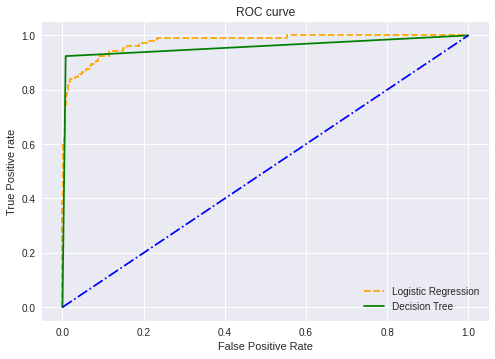

In [73]:
#Plot ROC Curve (TPR vs FPR)
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='-.', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

In [69]:
#Print ROC-AUC scores for both models
auc_score1 = roc_auc_score(y_test, log_prob[:,1])
auc_score2 = roc_auc_score(y_test, dt_prob[:,1])

print("ROC-AUC Score for Logistic Regression: ",auc_score1)
print("ROC-AUC Score for Decision Tree: ",auc_score2)

ROC-AUC Score for Logistic Regression:  0.9759936153232243
ROC-AUC Score for Decision Tree:  0.9579941473796223


## Conclusive Analysis

Summarize your findings and give reasoning for the results you obtained from task_1 and task_2 and compare the algorithms utilized based on the evaluations metrics used.

In [ ]:
print(?)